<a href="https://colab.research.google.com/github/majorquev/Introduccion_a_ciencia_de_datos_R/blob/master/Ayudant%C3%ADas/Ayudant%C3%ADa5/A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ayudantía 5**

**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Bastián Aballay Leiva<br>
**E-mail ayudante:** bastian.aballayleiva@gmail.com

   
   

Regresión Lineal

$y = f(x)$ \

$y = b_{0} + b_{1}x$

*   Regresor - Variable independiente - Variable explicativa - "x"
*   Variable dependiente- "y" - Variable endógena

# Variables Categóricas

- También son conocidas como "factores" o "variables cualitativas".
- Permiten clasificar observaciones en grupos
- Clasificación por "niveles"
- Por ejemplo: el género de un invidiuo es una variable categórica que puede tomar dos niveles
    - Hombre
    - Mujer
- Serán necesarios algunos pasos adicionales para considerar dichas variables
    - Separación en variables "binarias" (1/0)

In [3]:
# install.packages("tidyverse")
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [16]:
# Capacidad pulmonar | Edad | Altura | Fumador | Género | ?
lung_cap_df <- read.delim("https://raw.githubusercontent.com/majorquev/Introduccion_a_ciencia_de_datos_R/master/Ayudant%C3%ADas/Ayudant%C3%ADa5/LungCapData.txt")

In [21]:
lung_cap_df %>% sample_n(10)

LungCap,Age,Height,Smoke,Gender,Caesarean
<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>
3.675,3,54.2,no,male,yes
5.150,7,58.0,no,male,no
3.625,11,53.8,no,male,no
7.300,13,61.5,no,female,no
8.700,15,63.7,no,female,no
8.825,14,71.9,no,male,no
10.950,16,74.3,no,female,no
9.350,11,71.2,yes,male,no
11.875,14,71.2,no,male,no


In [22]:
summary(lung_cap_df)

    LungCap            Age            Height         Smoke          
 Min.   : 0.507   Min.   : 3.00   Min.   :45.30   Length:725        
 1st Qu.: 6.150   1st Qu.: 9.00   1st Qu.:59.90   Class :character  
 Median : 8.000   Median :13.00   Median :65.40   Mode  :character  
 Mean   : 7.863   Mean   :12.33   Mean   :64.84                     
 3rd Qu.: 9.800   3rd Qu.:15.00   3rd Qu.:70.30                     
 Max.   :14.675   Max.   :19.00   Max.   :81.80                     
    Gender           Caesarean        
 Length:725         Length:725        
 Class :character   Class :character  
 Mode  :character   Mode  :character  
                                      
                                      
                                      

In [34]:
# Coersionamos las variables character a factor para poder utilizarlas en regresión lineal
lung_cap_df$Smoke <- as.factor(lung_cap_df$Smoke)
lung_cap_df$Gender <- as.factor(lung_cap_df$Gender)
lung_cap_df$Caesarean <- as.factor(lung_cap_df$Caesarean)

In [35]:
head(lung_cap_df)

,LungCap,Age,Height,Smoke,Gender,Caesarean
,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>
1,6.475,6,62.1,no,male,no
2,10.125,18,74.7,yes,female,no
3,9.550,16,69.7,no,female,yes
4,11.125,14,71.0,no,male,no
5,4.800,5,56.9,no,male,no
6,6.225,11,58.7,no,female,no


In [33]:
levels(lung_cap_df$Smoke) # nos preparamos para usar una variable binaria o "dummy"/indicador
levels(lung_cap_df$Gender)

[1] "no"  "yes"

[1] "female" "male"

In [37]:
# y = f(x) + e  -> LungCap = f(Age, Smoke)
lungcap_model <- lm(LungCap ~ Age + Smoke, data = lung_cap_df)
summary(lungcap_model)


Call:
lm(formula = LungCap ~ Age + Smoke, data = lung_cap_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8559 -1.0289 -0.0363  1.0083  4.1995 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.08572    0.18299   5.933 4.61e-09 ***
Age          0.55540    0.01438  38.628  < 2e-16 ***
Smokeyes    -0.64859    0.18676  -3.473 0.000546 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.514 on 722 degrees of freedom
Multiple R-squared:  0.6773,	Adjusted R-squared:  0.6764 
F-statistic: 757.5 on 2 and 722 DF,  p-value: < 2.2e-16


El modelo de regresión ajustado corresponde a:
$\hat{\mu}_{y|x} = 1.085 + 0.555 \times Age - 0.648 \times Smoke$ 

En el caso de ser fumador:

$\hat{\mu}_{y|x} = 1.085 + 0.555 \times Age - 0.648 \times Smoke$ 

$\hat{\mu}_{y|x} = 1.085 + 0.555 \times Age - 0.648 \times (1)$

$\hat{\mu}_{y|x} = (1.085  - 0.648) + 0.555 \times Age$

$\hat{\mu}_{y|x} = 0.437 + 0.555 \times Age$

En el caso de no ser fumador:

$\hat{\mu}_{y|x} = 1.085 + 0.555 \times Age$ 

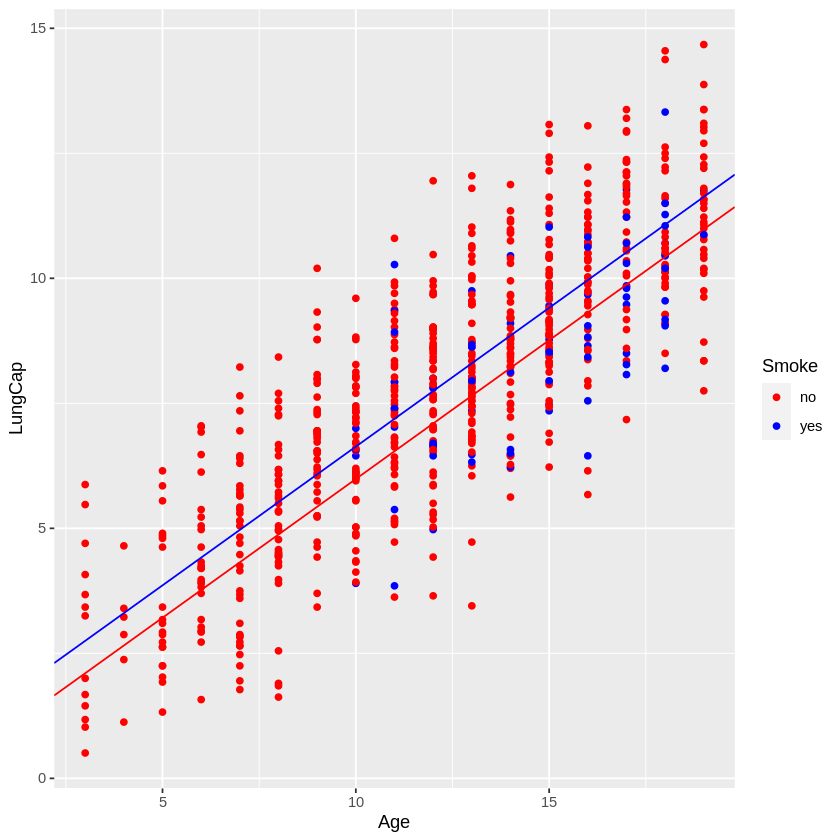

In [48]:
ggplot(lung_cap_df, aes(x = Age, y = LungCap, color = Smoke)) +
  geom_point() +
  scale_color_manual(values = c("red","blue")) +
  geom_abline(intercept = 1.085, slope = 0.555, color = "blue") +
  geom_abline(intercept = 0.437, slope = 0.555, color = "red")
# No existe interaccion entre fumar y la edad
# el efecto de fumar no se ve modificado por la edad